# Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1 – Data Cleaning

In [2]:
df_student = pd.read_csv(r'students.csv', encoding='latin1')
df_student.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


## 1. Check dataset structure


In [3]:
df_student.shape

(77, 11)

In [4]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [5]:
df_student.dtypes

fNAME             object
lNAME             object
Age                int64
gender            object
country           object
residence         object
entryEXAM          int64
prevEducation     object
studyHOURS         int64
Python           float64
DB                 int64
dtype: object

## 2. Detect inconsistent categories

In [6]:
df_student['gender'].str.upper().unique()

array(['FEMALE', 'M', 'MALE', 'F'], dtype=object)

In [7]:
df_student['gender'] = df_student['gender'].str.upper()

In [8]:
df_student['gender'].replace({
    'FEMALE': 'F',
    'MALE': 'M'
}, inplace=True)

C:\Users\hadys\AppData\Local\Temp\ipykernel_2648\2069411407.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_student['gender'].replace({


In [9]:
df_student['gender'].unique()

array(['F', 'M'], dtype=object)

In [10]:
df_student['country'].str.upper().unique()

array(['NORWAY', 'KENYA', 'UGANDA', 'RSA', 'SOUTH AFRICA', 'NORGE',
       'DENMARK', 'NETHERLANDS', 'ITALY', 'SPAIN', 'UK', 'SOMALI',
       'NIGERIA', 'GERMANY', 'FRANCE'], dtype=object)

In [11]:
print(sorted(df_student['country'].str.upper().unique()))

['DENMARK', 'FRANCE', 'GERMANY', 'ITALY', 'KENYA', 'NETHERLANDS', 'NIGERIA', 'NORGE', 'NORWAY', 'RSA', 'SOMALI', 'SOUTH AFRICA', 'SPAIN', 'UGANDA', 'UK']


In [12]:
df_student['country'] = df_student['country'].str.upper()

In [13]:
df_student['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [14]:
print(sorted(df_student['prevEducation'].str.upper().unique()))

['BACHELORS', 'BARRRCHELORS', 'DIPLOMA', 'DIPLOMAAA', 'DOCTORATE', 'HIGH SCHOOL', 'HIGHSCHOOL', 'MASTERS']


In [15]:
df_student['prevEducation'] = df_student['prevEducation'].str.upper()

In [16]:
df_student['prevEducation'].replace({
    'BARRRCHELORS': 'BACHELORS',
    'DIPLOMAAA': 'DIPLOMA',
    'HIGH SCHOOL': 'HIGHSCHOOL'
}, inplace=True)

C:\Users\hadys\AppData\Local\Temp\ipykernel_2648\3345426939.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_student['prevEducation'].replace({


In [17]:
print(sorted(df_student['prevEducation'].unique()))

['BACHELORS', 'DIPLOMA', 'DOCTORATE', 'HIGHSCHOOL', 'MASTERS']


## 3. Handle duplicates

In [18]:
df_student.duplicated().sum()

np.int64(0)

In [19]:
df_student.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,F,NORWAY,Private,72,MASTERS,158,59.0,55
1,Alex,Walekhwa,60,M,KENYA,Private,79,DIPLOMA,150,60.0,75
2,Philip,Leo,25,M,UGANDA,Sognsvann,55,HIGHSCHOOL,130,74.0,50
3,Shoni,Hlongwane,22,F,RSA,Sognsvann,40,HIGHSCHOOL,120,NaN,44
4,Maria,Kedibone,23,F,SOUTH AFRICA,Sognsvann,65,HIGHSCHOOL,122,91.0,80


In [20]:
df_student['fNAME'].value_counts()

fNAME
Grethe      2
Chinedu     2
Hanna       2
Odd         2
Bjørn       2
           ..
Clara       1
Julian      1
Sophie      1
Leon        1
Mohammed    1
Name: count, Length: 71, dtype: int64

In [21]:
(   
    df_student
    .groupby('fNAME')['fNAME']
    .size()
    .reset_index(name='count')
    .query("count > 1")
)

,fNAME,count
5,Bjørn,2
9,Chinedu,2
15,Emma,2
18,Grethe,2
20,Hanna,2
46,Odd,2


In [22]:
df_student[
    df_student
    .groupby('fNAME')['fNAME']
    .transform('count') > 1
].sort_values('fNAME')

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
8,Bjørn,Larsen,31,M,NORWAY,BI Residence,88,BACHELORS,156,80.0,89
52,Bjørn,Pedersen,21,F,NORWAY,BI Residence,70,HIGHSCHOOL,138,69.0,47
53,Chinedu,Morison,36,M,NIGERIA,Private,28,DIPLOMA,120,15.0,67
55,Chinedu,Okafor,69,M,NIGERIA,Private,94,DOCTORATE,160,87.0,88
10,Emma,de Vries,34,F,NETHERLANDS,BI Residence,65,BACHELORS,156,79.0,58
70,Emma,Janssen,39,F,NETHERLANDS,Private,81,MASTERS,160,80.0,71
13,Grethe,Myklebust,40,F,NORWAY,Private,77,DIPLOMA,144,70.0,76
43,Grethe,Brekke,43,F,NORWAY,Private,96,MASTERS,158,87.0,92
16,Hanna,Andresen,45,F,NORWAY,Private,85,BACHELORS,156,87.0,82
21,Hanna,Isaksen,24,F,NORWAY,BI Residence,50,HIGHSCHOOL,114,30.0,50


In [23]:
df_student[df_student['fNAME'].duplicated(keep=False)].sort_values('fNAME')

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
8,Bjørn,Larsen,31,M,NORWAY,BI Residence,88,BACHELORS,156,80.0,89
52,Bjørn,Pedersen,21,F,NORWAY,BI Residence,70,HIGHSCHOOL,138,69.0,47
53,Chinedu,Morison,36,M,NIGERIA,Private,28,DIPLOMA,120,15.0,67
55,Chinedu,Okafor,69,M,NIGERIA,Private,94,DOCTORATE,160,87.0,88
10,Emma,de Vries,34,F,NETHERLANDS,BI Residence,65,BACHELORS,156,79.0,58
70,Emma,Janssen,39,F,NETHERLANDS,Private,81,MASTERS,160,80.0,71
13,Grethe,Myklebust,40,F,NORWAY,Private,77,DIPLOMA,144,70.0,76
43,Grethe,Brekke,43,F,NORWAY,Private,96,MASTERS,158,87.0,92
16,Hanna,Andresen,45,F,NORWAY,Private,85,BACHELORS,156,87.0,82
21,Hanna,Isaksen,24,F,NORWAY,BI Residence,50,HIGHSCHOOL,114,30.0,50


No Duplicates

----------------

# Part 2 – Missing Data

## 1. Identify missing values

In [25]:
df_student.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

## 2. Impute missing values


In [27]:
df_student[['Python']].describe()

,Python
count,77.000000
mean,75.831169
std,15.206822
min,15.000000
25%,72.000000
50%,81.000000
75%,85.000000
max,91.000000


In [28]:
df_student['Python'] = df_student['Python'].fillna(int(df_student['Python'].mean())).astype(int)

--------

# Part 3 – Outliers


## 1. Detect outliers


In [29]:
df_student.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.207792,76.753247,149.714286,75.831169,69.467532
std,10.341966,16.475784,12.743272,15.206822,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,72.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


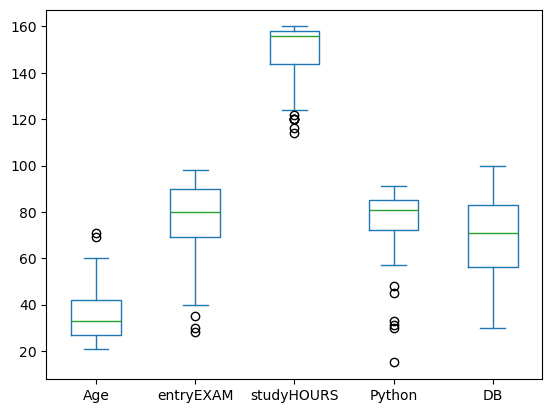

In [30]:
df_student.plot(kind='box')
plt.show()

In [31]:
Q1 = df_student['Python'].quantile(0.25)
Q3 = df_student['Python'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f' lower: {lower}\n', f'upper: {upper}')

outliers_Python = df_student[(df_student['Python'] < lower) | (df_student['Python'] > upper)]
outliers_Python

 lower: 52.5
 upper: 104.5


,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
20,Prof,Birkeland,22,M,NORWAY,BI Residence,45,HIGHSCHOOL,116,33,30
21,Hanna,Isaksen,24,F,NORWAY,BI Residence,50,HIGHSCHOOL,114,30,50
32,Perry,Rønning,71,F,NORWAY,Private,30,DOCTORATE,120,31,42
48,Jenny,Kristoffersen,26,F,NORWAY,BI Residence,68,HIGHSCHOOL,124,48,62
49,Thea,Knutsen,28,M,NORWAY,BI Residence,69,HIGHSCHOOL,120,45,70
53,Chinedu,Morison,36,M,NIGERIA,Private,28,DIPLOMA,120,15,67


<Axes: xlabel='Python'>

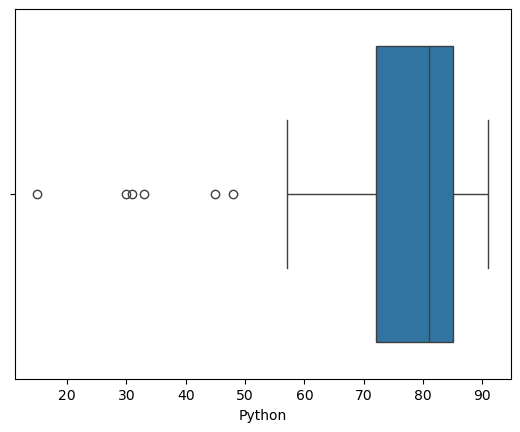

In [32]:
sns.boxplot(x='Python', data=df_student)

In [33]:
Q1 = df_student['studyHOURS'].quantile(0.25)
Q3 = df_student['studyHOURS'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f' lower: {lower}\n', f'upper: {upper}')

outliers_studyHOURS = df_student[(df_student['studyHOURS'] < lower) | (df_student['studyHOURS'] > upper)]
outliers_studyHOURS

 lower: 123.0
 upper: 179.0


,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
3,Shoni,Hlongwane,22,F,RSA,Sognsvann,40,HIGHSCHOOL,120,75,44
4,Maria,Kedibone,23,F,SOUTH AFRICA,Sognsvann,65,HIGHSCHOOL,122,91,80
20,Prof,Birkeland,22,M,NORWAY,BI Residence,45,HIGHSCHOOL,116,33,30
21,Hanna,Isaksen,24,F,NORWAY,BI Residence,50,HIGHSCHOOL,114,30,50
32,Perry,Rønning,71,F,NORWAY,Private,30,DOCTORATE,120,31,42
49,Thea,Knutsen,28,M,NORWAY,BI Residence,69,HIGHSCHOOL,120,45,70
53,Chinedu,Morison,36,M,NIGERIA,Private,28,DIPLOMA,120,15,67


# 2. Handle outliers


In [34]:
outliers_Python

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
20,Prof,Birkeland,22,M,NORWAY,BI Residence,45,HIGHSCHOOL,116,33,30
21,Hanna,Isaksen,24,F,NORWAY,BI Residence,50,HIGHSCHOOL,114,30,50
32,Perry,Rønning,71,F,NORWAY,Private,30,DOCTORATE,120,31,42
48,Jenny,Kristoffersen,26,F,NORWAY,BI Residence,68,HIGHSCHOOL,124,48,62
49,Thea,Knutsen,28,M,NORWAY,BI Residence,69,HIGHSCHOOL,120,45,70
53,Chinedu,Morison,36,M,NIGERIA,Private,28,DIPLOMA,120,15,67


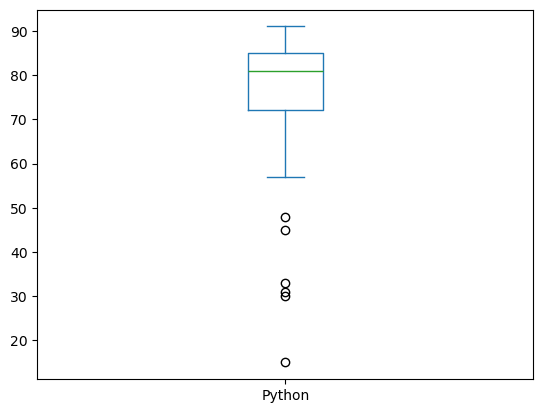

In [35]:
df_student['Python'].plot(kind='box')
plt.show()

In [68]:
def cap_outliers(df, column):
    """
    • Caps outliers in a numeric column using the IQR method (winsorization)
    • Instead of removing outliers or replacing them with the mean/median,
      You clip them to the nearest allowed boundary (usually the lower/upper IQR thresholds).
    
    Args:
        df (pd.DataFrame): The dataframe.
        column (str): The column name to process.
        
    Returns:
        pd.DataFrame: dataframe with outliers capped at lower/upper bounds.
    """
    df = df.copy()

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Boolean mask for outliers
    mask = (df[column] < lower) | (df[column] > upper)

    # Cap values
    df[column] = df[column].clip(lower, upper) # Assigns values outside boundary to boundary values

    return df


In [69]:
df_student = cap_outliers(df_student, "Python")
df_student

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,F,NORWAY,Private,72,MASTERS,158,62.5,55
1,Alex,Walekhwa,60,M,KENYA,Private,79,DIPLOMA,150,62.5,75
2,Philip,Leo,25,M,UGANDA,Sognsvann,55,HIGHSCHOOL,130,74.0,50
3,Shoni,Hlongwane,22,F,RSA,Sognsvann,40,HIGHSCHOOL,120,75.0,44
4,Maria,Kedibone,23,F,SOUTH AFRICA,Sognsvann,65,HIGHSCHOOL,122,91.0,80
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,F,FRANCE,Private,80,BACHELORS,150,75.0,43
73,Julian,Nielsen,31,M,DENMARK,Sognsvann,90,MASTERS,158,84.0,83
74,Sophie,Brown,33,F,UK,Sognsvann,96,MASTERS,158,85.0,90
75,Leon,Bauer,35,M,GERMANY,Sognsvann,90,MASTERS,160,87.0,74


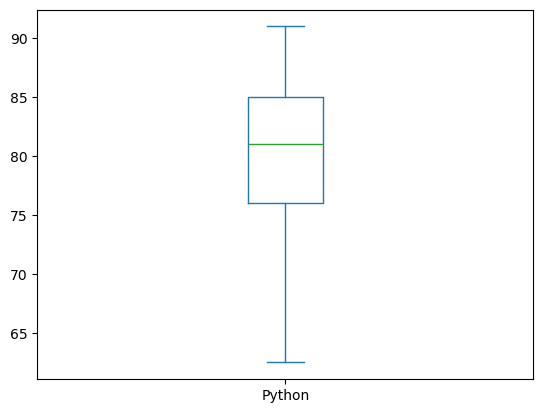

In [73]:
df_student['Python'].plot(kind='box')
plt.show()

In [74]:
outliers_studyHOURS

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
3,Shoni,Hlongwane,22,F,RSA,Sognsvann,40,HIGHSCHOOL,120,75,44
4,Maria,Kedibone,23,F,SOUTH AFRICA,Sognsvann,65,HIGHSCHOOL,122,91,80
20,Prof,Birkeland,22,M,NORWAY,BI Residence,45,HIGHSCHOOL,116,33,30
21,Hanna,Isaksen,24,F,NORWAY,BI Residence,50,HIGHSCHOOL,114,30,50
32,Perry,Rønning,71,F,NORWAY,Private,30,DOCTORATE,120,31,42
49,Thea,Knutsen,28,M,NORWAY,BI Residence,69,HIGHSCHOOL,120,45,70
53,Chinedu,Morison,36,M,NIGERIA,Private,28,DIPLOMA,120,15,67


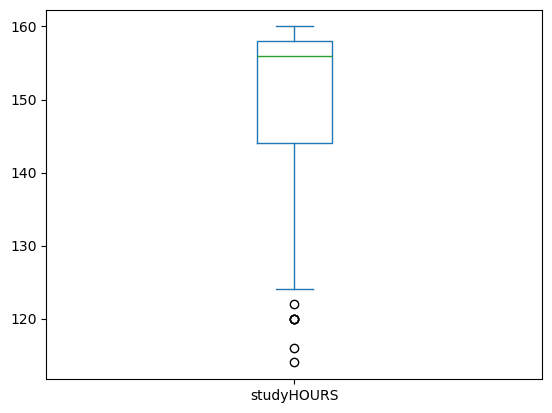

In [75]:
df_student['studyHOURS'].plot(kind='box')
plt.show()

In [76]:
df_student = cap_outliers(df_student, "studyHOURS")
df_student

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,F,NORWAY,Private,72,MASTERS,158,62.5,55
1,Alex,Walekhwa,60,M,KENYA,Private,79,DIPLOMA,150,62.5,75
2,Philip,Leo,25,M,UGANDA,Sognsvann,55,HIGHSCHOOL,130,74.0,50
3,Shoni,Hlongwane,22,F,RSA,Sognsvann,40,HIGHSCHOOL,123,75.0,44
4,Maria,Kedibone,23,F,SOUTH AFRICA,Sognsvann,65,HIGHSCHOOL,123,91.0,80
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,F,FRANCE,Private,80,BACHELORS,150,75.0,43
73,Julian,Nielsen,31,M,DENMARK,Sognsvann,90,MASTERS,158,84.0,83
74,Sophie,Brown,33,F,UK,Sognsvann,96,MASTERS,158,85.0,90
75,Leon,Bauer,35,M,GERMANY,Sognsvann,90,MASTERS,160,87.0,74


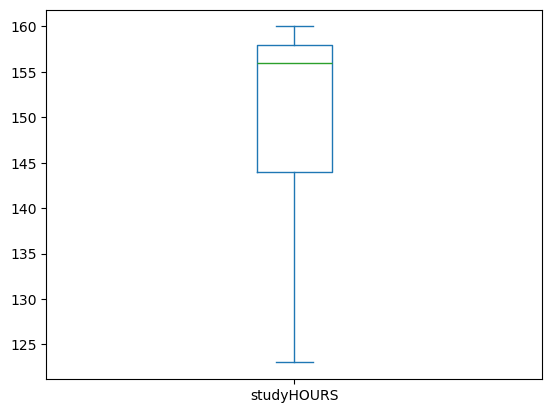

In [77]:
df_student['studyHOURS'].plot(kind='box')
plt.show()

-------------

# Save the cleaned data to a CSV file

In [78]:
df_student.to_csv("cleaned_students.csv", index=False)